In [2]:
!pip3 install pmdarima
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots
import pmdarima as pm
import matplotlib.pyplot as plt





     |████████████████████████████████| 921kB 2.8MB/s 


In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')



In [4]:
data_path = "/content/drive/My Drive/Colab Notebooks/"

df = pd.read_csv(data_path + "cooked_v3.csv")
print(df.head())
print(df.CalcDateTime.min())
print(df.CalcDateTime.max())

# tickers and their traded volumes
volume_series = df.groupby('Mnemonic')['TradedVolume'].sum()
volume_series.sort_values(ascending=False, inplace=True)
print(volume_series)

df.head()
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)


          CalcDateTime Mnemonic  MinPrice  MaxPrice  StartPrice  EndPrice  \
0  2017-07-03 08:00:00      SNH     4.450     4.456       4.456     4.450   
1  2017-07-03 08:01:00      SNH     4.450     4.456       4.456     4.450   
2  2017-07-03 08:02:00      SNH     4.450     4.456       4.456     4.450   
3  2017-07-03 08:03:00      SNH     4.457     4.457       4.457     4.457   
4  2017-07-03 08:04:00      SNH     4.457     4.457       4.457     4.457   

   HasTrade  TradedVolume  NumberOfTrades  
0       1.0        5505.0             9.0  
1       0.0           0.0             0.0  
2       0.0           0.0             0.0  
3       1.0         899.0             2.0  
4       0.0           0.0             0.0  
2017-07-03 08:00:00
2018-05-15 20:00:00
Mnemonic
SNH     4.182139e+09
DBK     2.346360e+09
EOAN    1.883320e+09
DTE     1.695683e+09
CBK     1.575910e+09
RWE     8.374443e+08
IFX     7.630757e+08
SVAB    6.026515e+08
LHA     5.934044e+08
DAI     4.894308e+08
O2D     4.2069

Ticker SNH has 156457 records.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


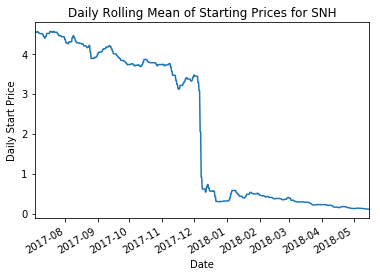

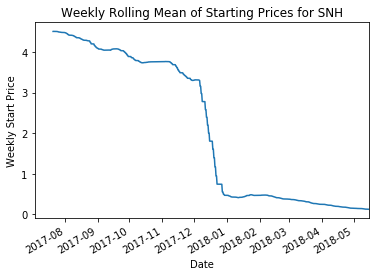

Ticker DBK has 156457 records.


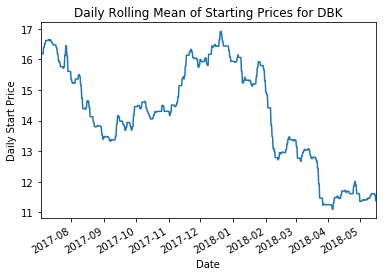

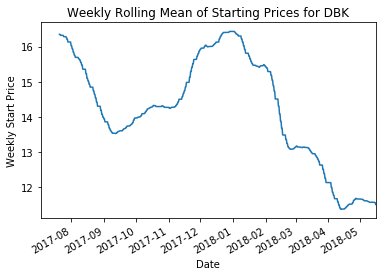

Ticker EOAN has 156457 records.


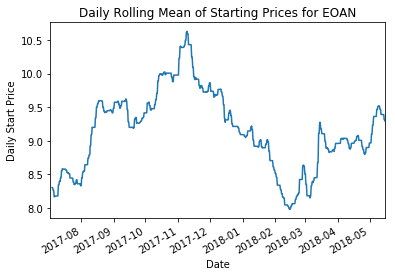

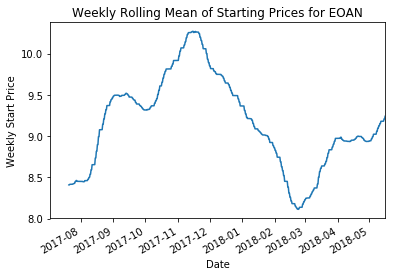

Ticker DTE has 156457 records.


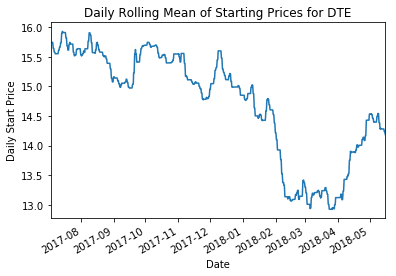

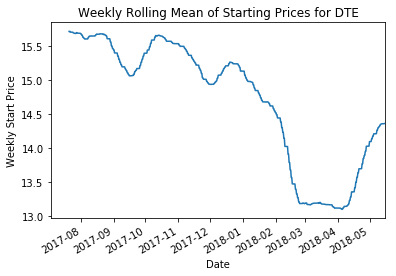

Ticker CBK has 156457 records.


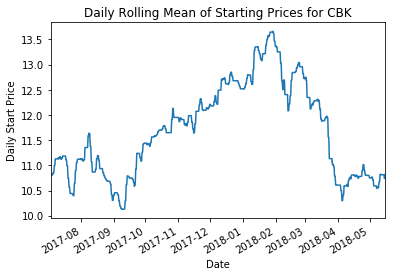

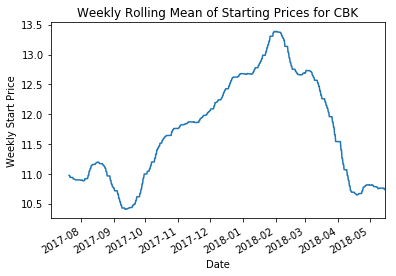

Ticker RWE has 156457 records.


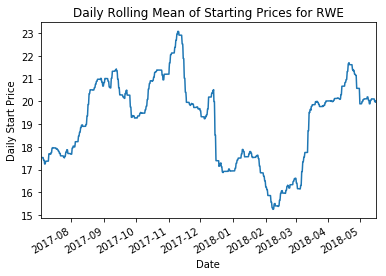

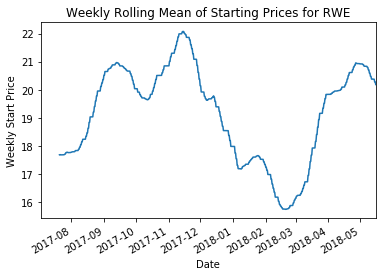

Ticker IFX has 156457 records.


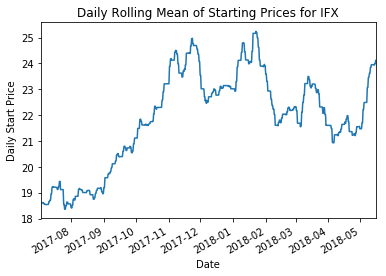

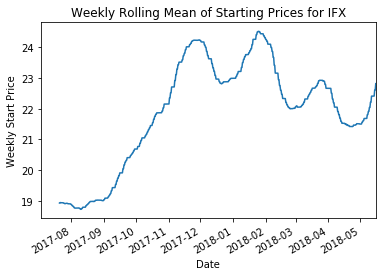

Ticker SVAB has 156446 records.


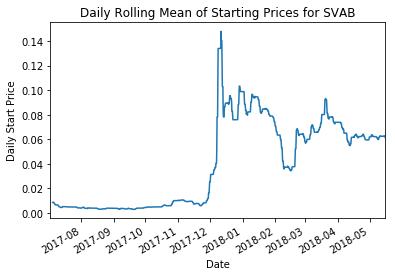

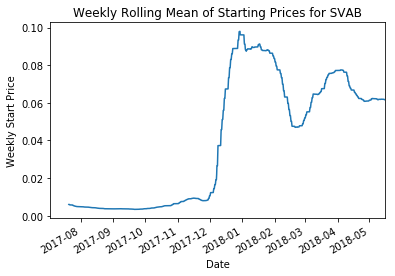

Ticker LHA has 156457 records.


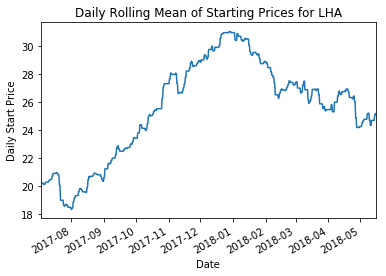

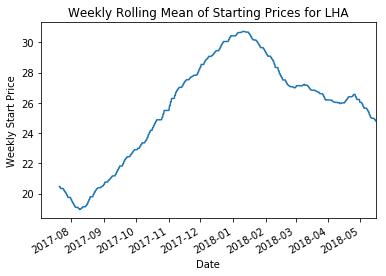

Ticker DAI has 156457 records.


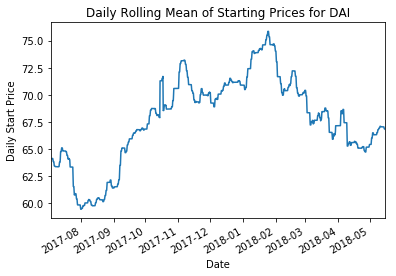

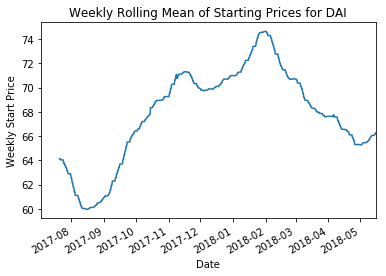

Ticker O2D has 156455 records.


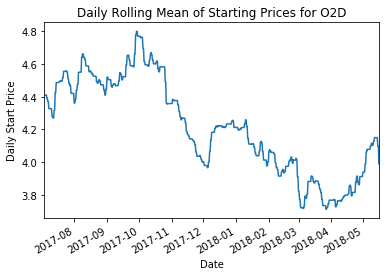

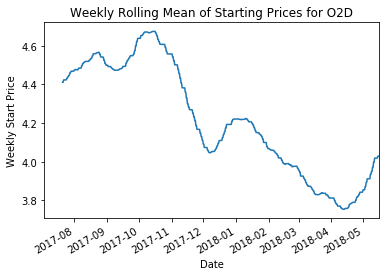

Ticker TKA has 156457 records.


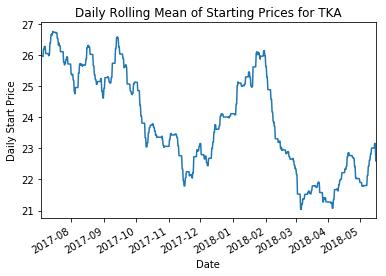

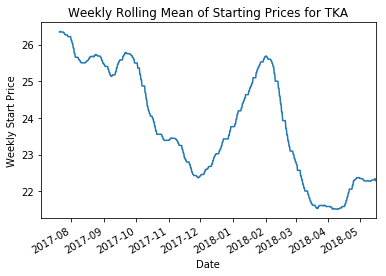

Ticker DPW has 156457 records.


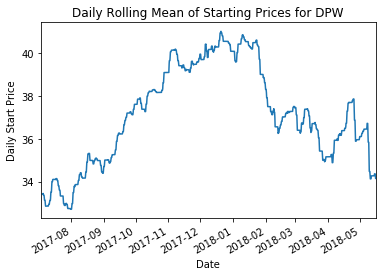

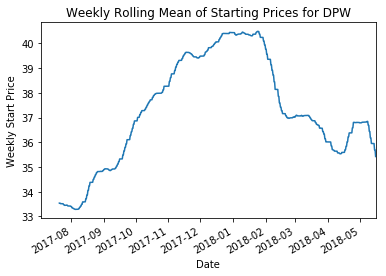

Ticker SIE has 156457 records.


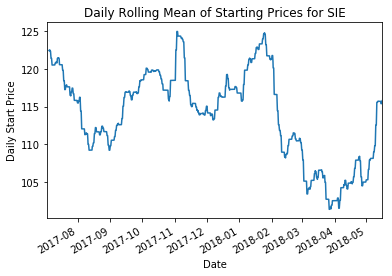

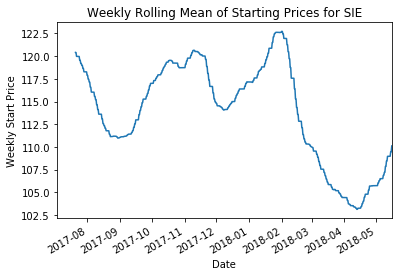

Ticker HDD has 156457 records.


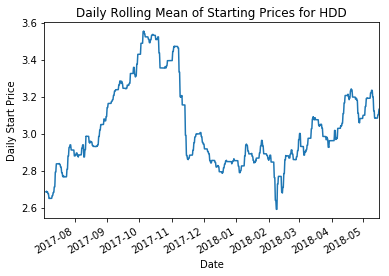

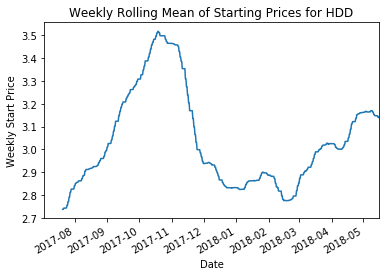

Ticker BAYN has 156457 records.


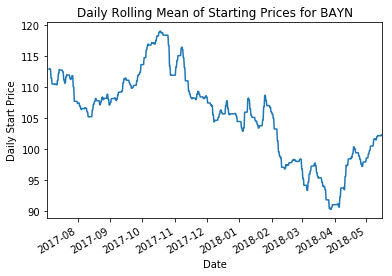

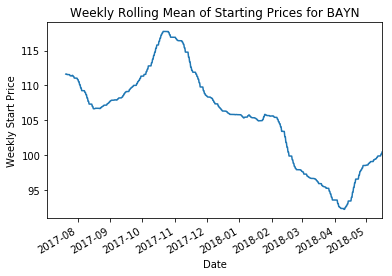

Ticker AIXA has 156457 records.


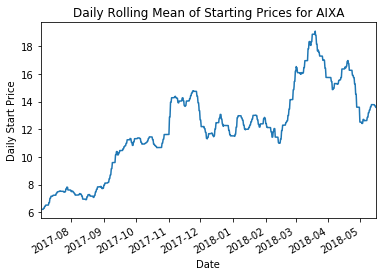

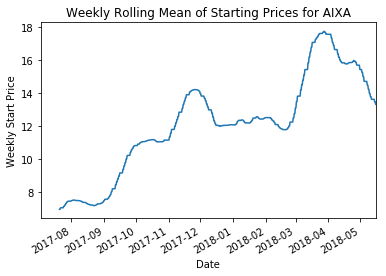

Ticker SAP has 156457 records.


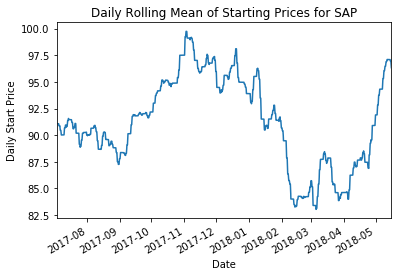

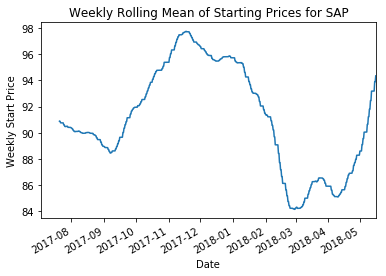

Ticker BAS has 156457 records.


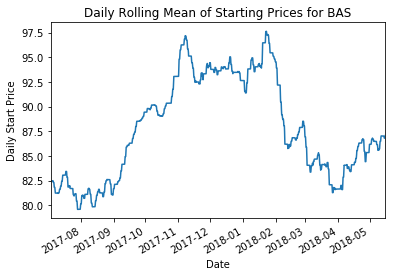

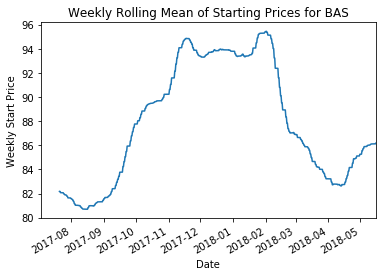

Ticker EVT has 156457 records.


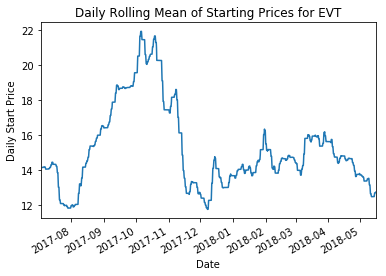

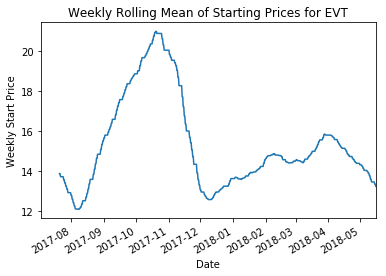

Ticker AT1 has 156391 records.


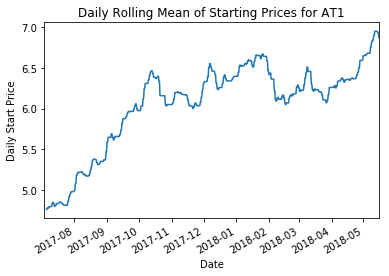

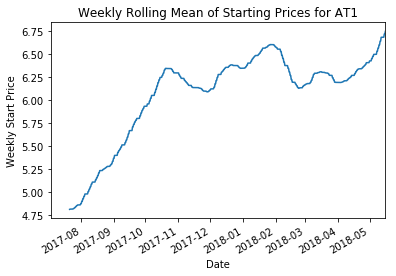

Ticker PSM has 156457 records.


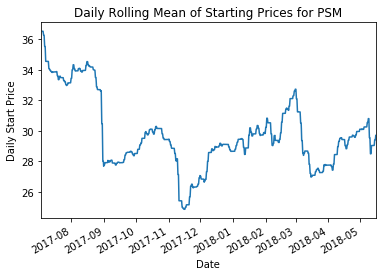

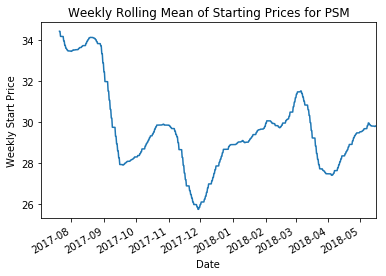

Ticker BMW has 156457 records.


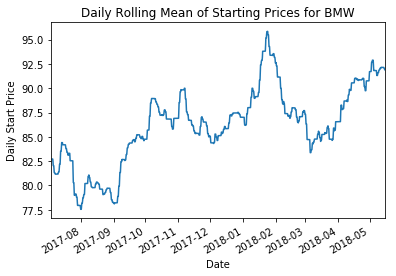

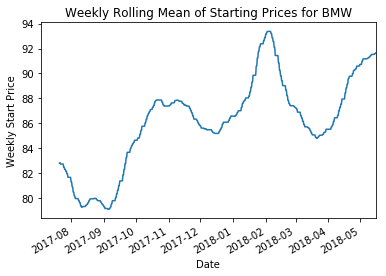

Ticker VOW3 has 156457 records.


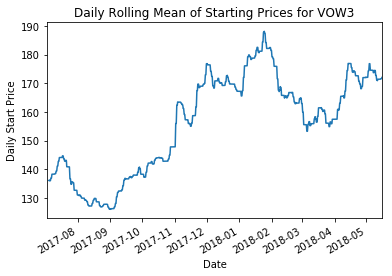

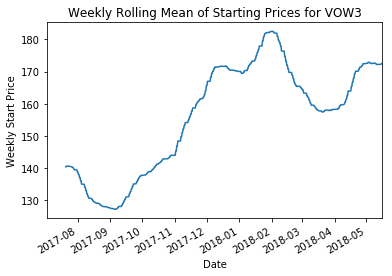

Ticker FRE has 156457 records.


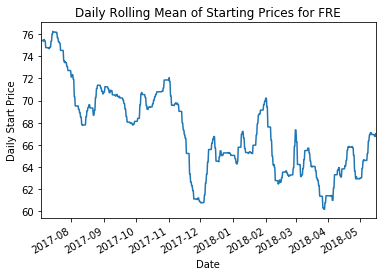

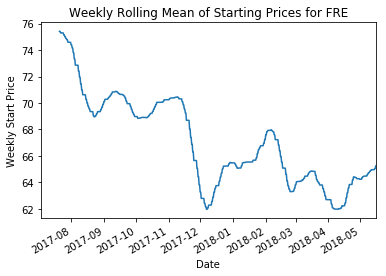

Ticker SDF has 156456 records.


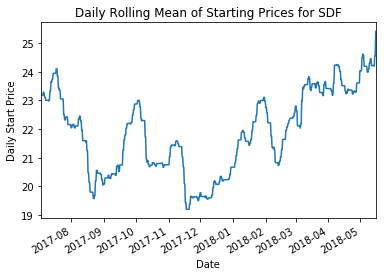

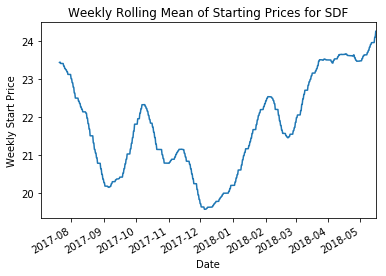

Ticker ALV has 156457 records.


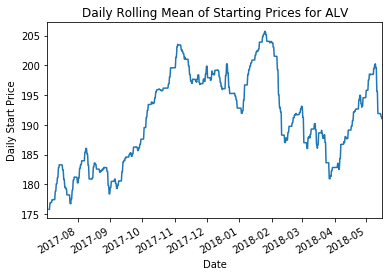

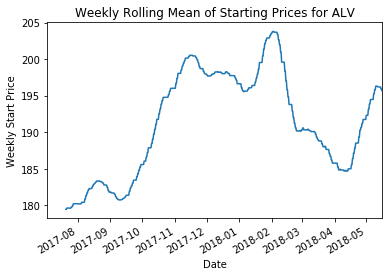

Ticker CEC has 150688 records.


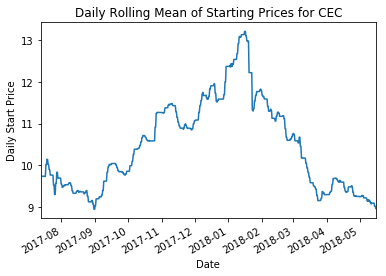

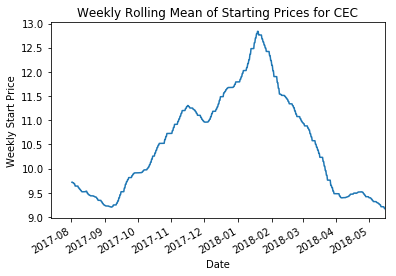

Ticker GAZ has 156457 records.


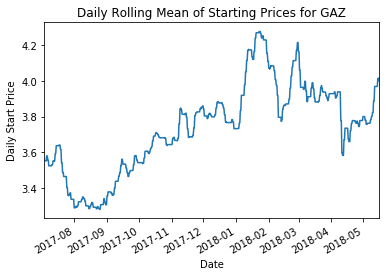

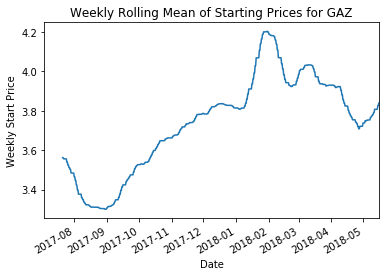

Ticker VNA has 156457 records.


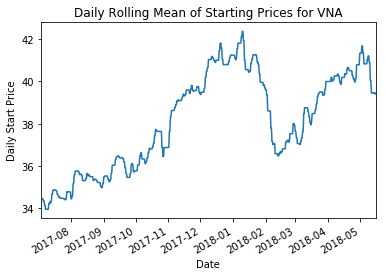

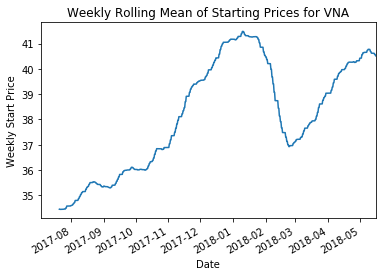

Ticker B4B has 150689 records.


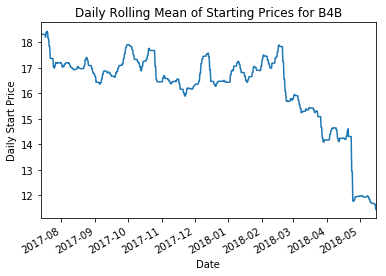

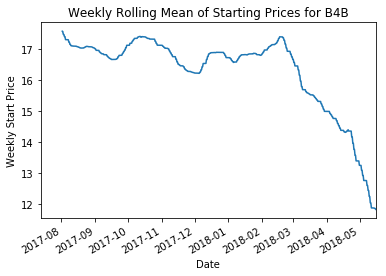

Ticker SHA has 156457 records.


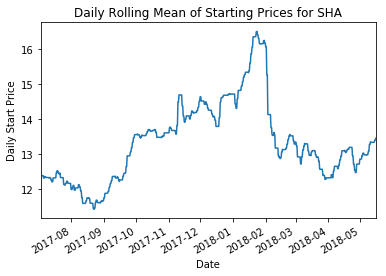

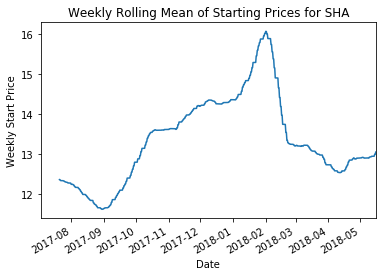

Ticker AB1 has 156441 records.


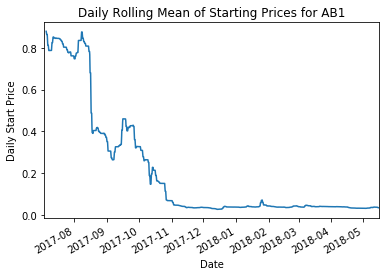

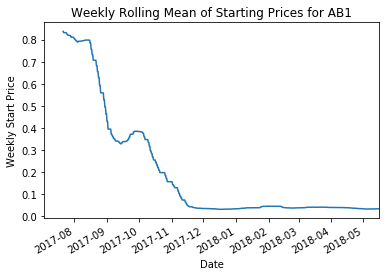

Ticker DLG has 156457 records.


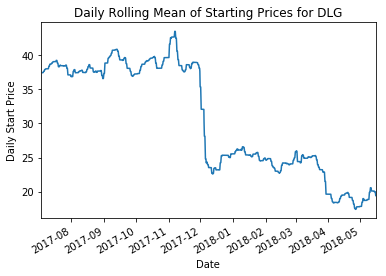

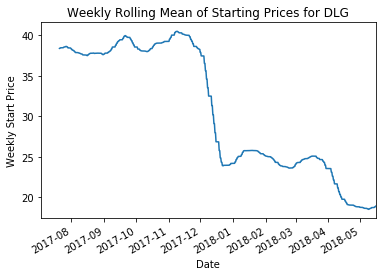

Ticker NDX1 has 156457 records.


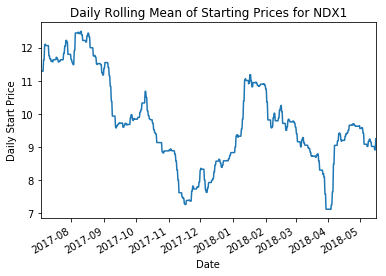

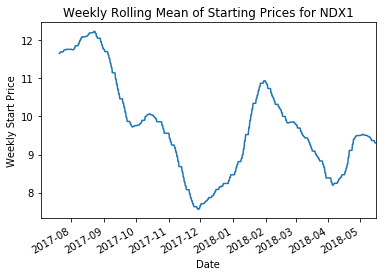

Ticker UN01 has 156457 records.


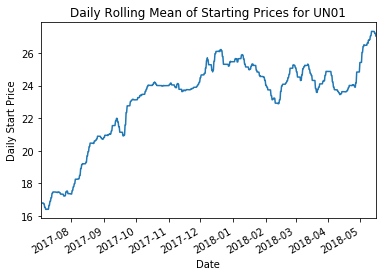

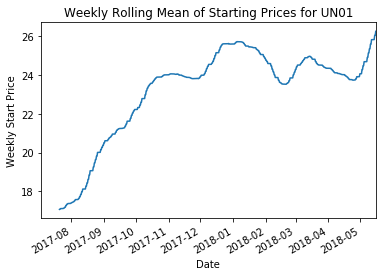

Ticker NOA3 has 156455 records.


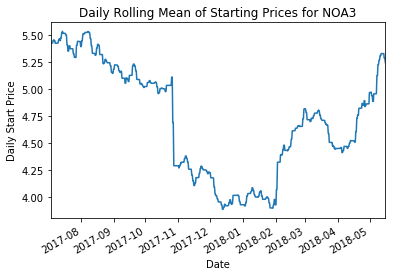

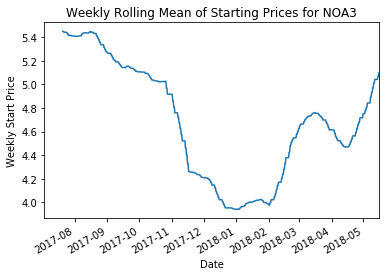

Ticker IGY has 156454 records.


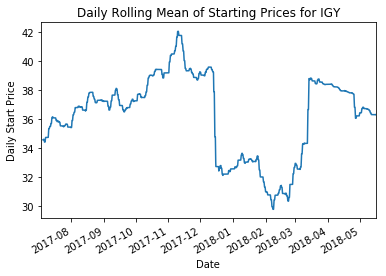

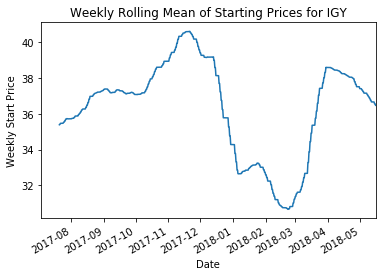

Ticker ADS has 156457 records.


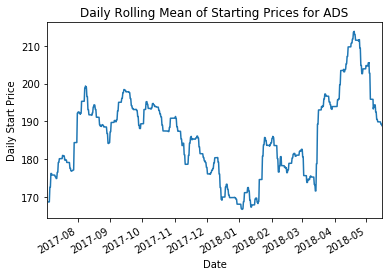

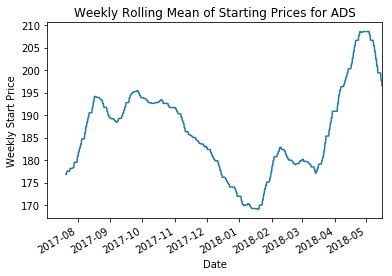

Ticker VODI has 156457 records.


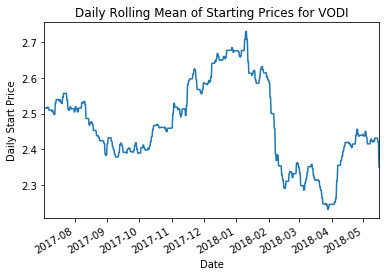

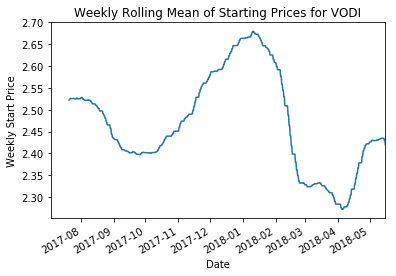

Ticker 1COV has 156457 records.


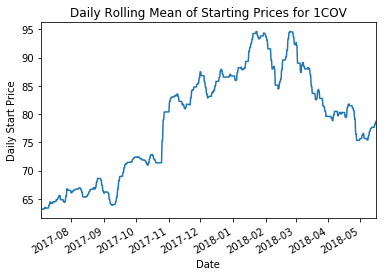

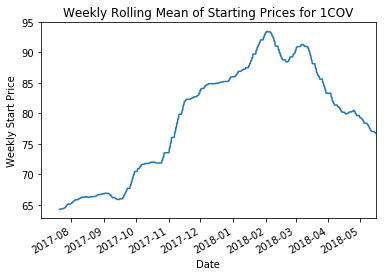

Ticker TUI1 has 156457 records.


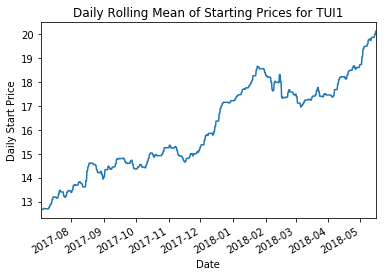

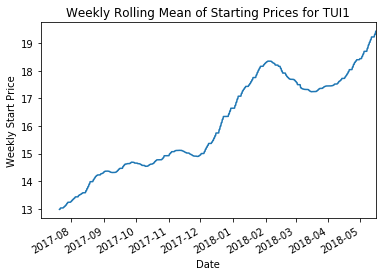

Ticker BPE5 has 156457 records.


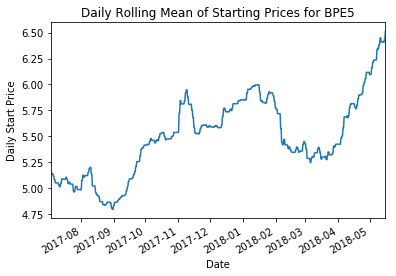

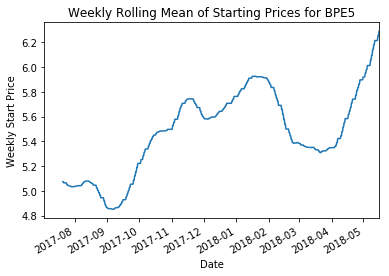

Ticker HEI has 156457 records.


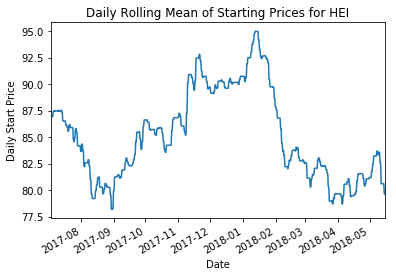

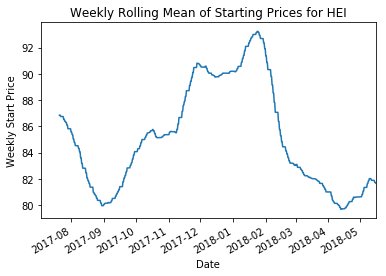

Ticker USE has 156311 records.


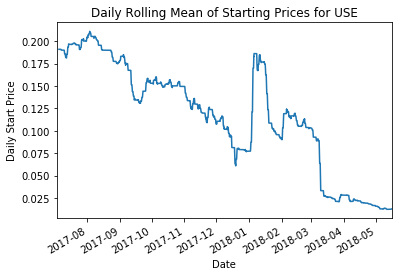

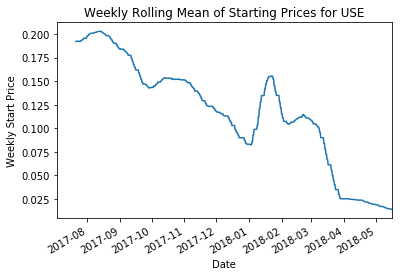

Ticker KCO has 156456 records.


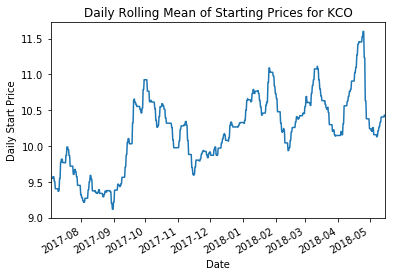

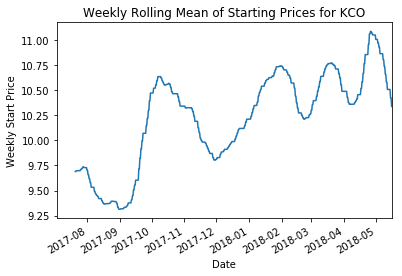

Ticker SZU has 156457 records.


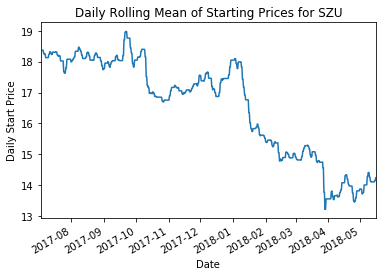

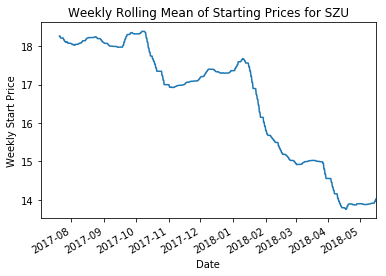

Ticker EVK has 156457 records.


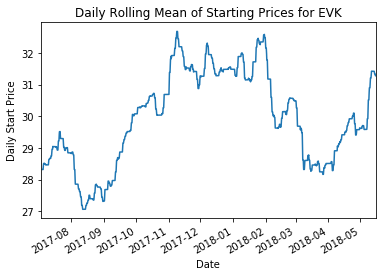

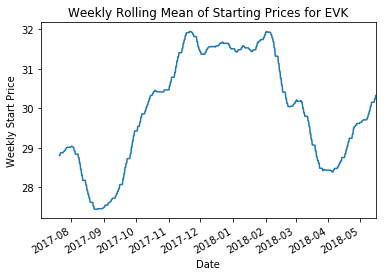

Ticker ADV has 156454 records.


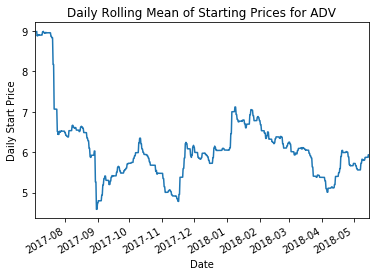

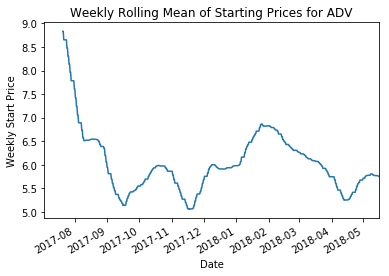

Ticker HEN3 has 156457 records.


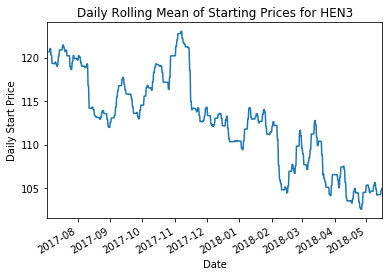

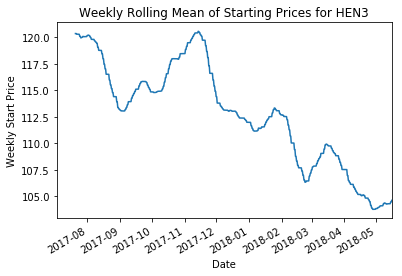

Ticker MUV2 has 156457 records.


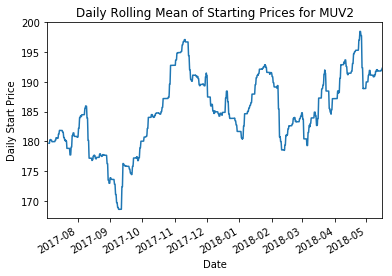

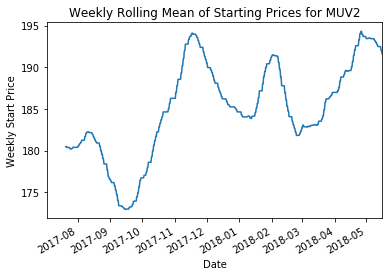

Ticker WDI has 156457 records.


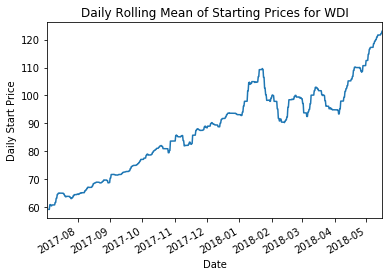

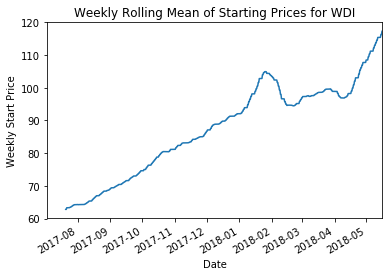

Ticker DWNI has 156457 records.


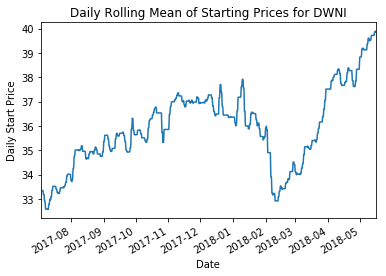

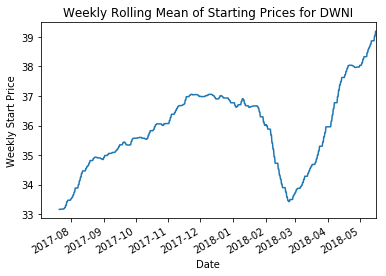

Ticker MRK has 156457 records.


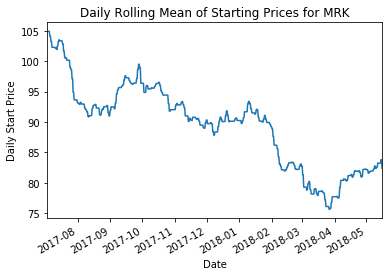

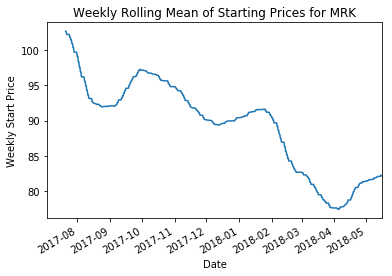

Ticker PAH3 has 156456 records.


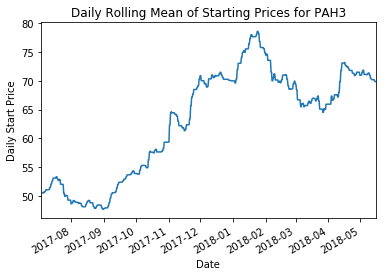

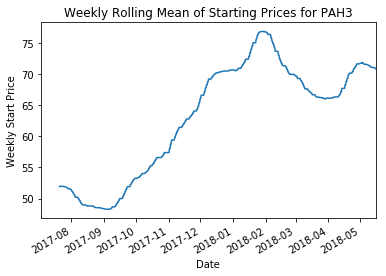

Ticker DEZ has 156457 records.


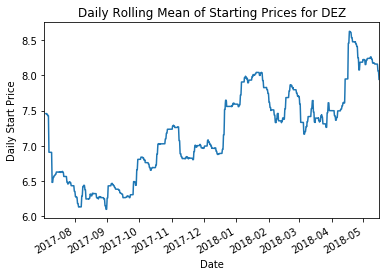

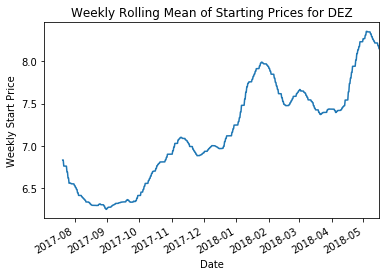

Ticker FME has 156456 records.


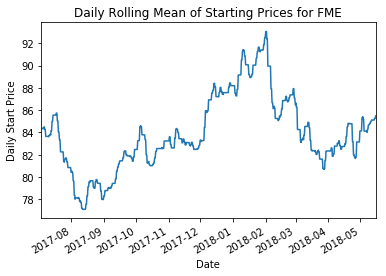

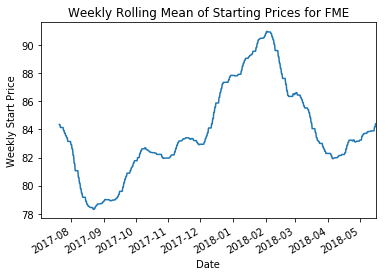

Ticker FNTN has 156457 records.


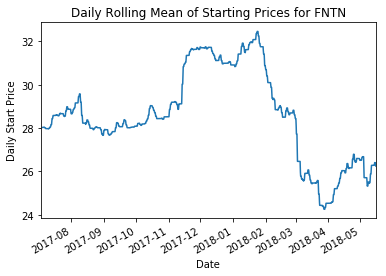

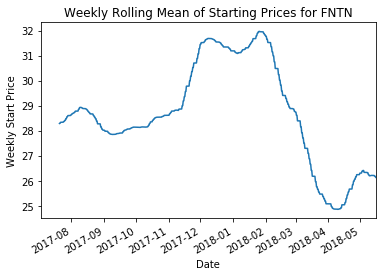

Ticker G1A has 156457 records.


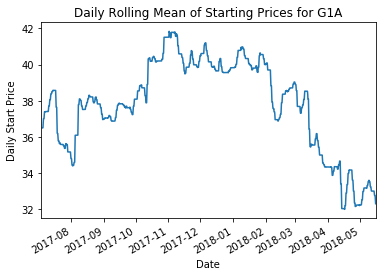

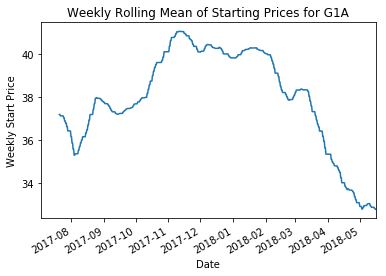

Ticker RKET has 156457 records.


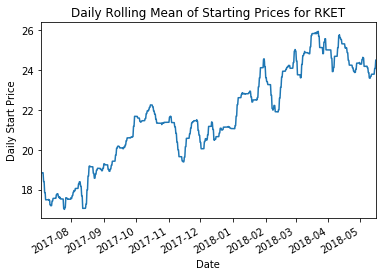

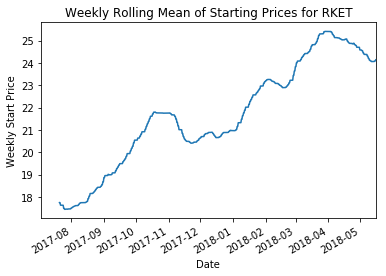

Ticker QIA has 156457 records.


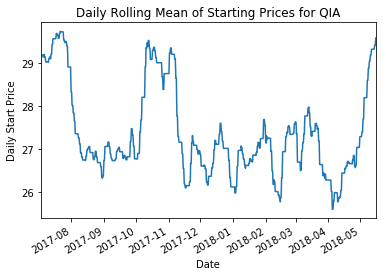

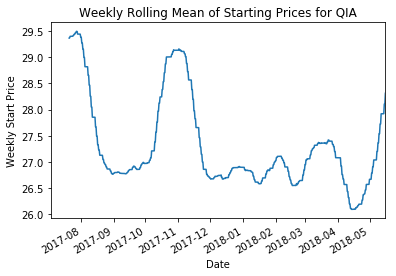

Ticker DB1 has 156457 records.


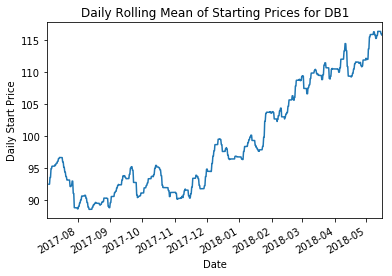

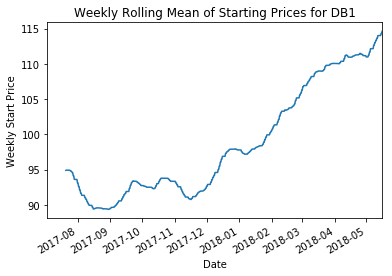

Ticker ZAL has 156456 records.


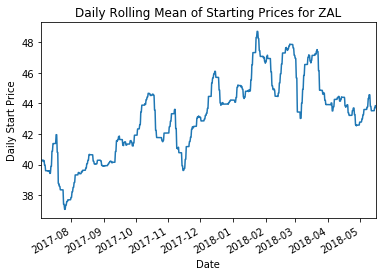

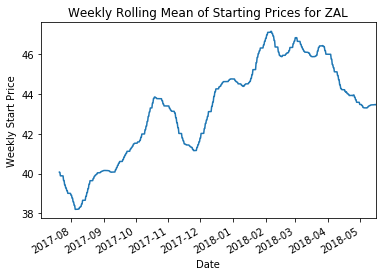

Ticker RIB has 156451 records.


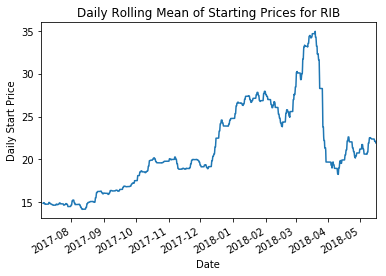

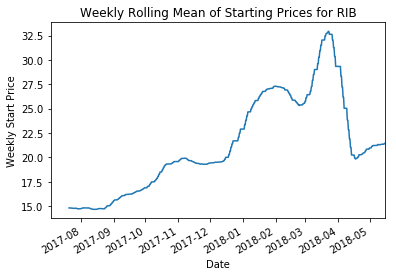

Ticker QSC has 156449 records.


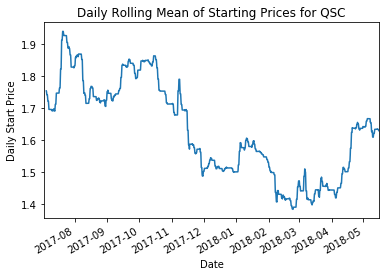

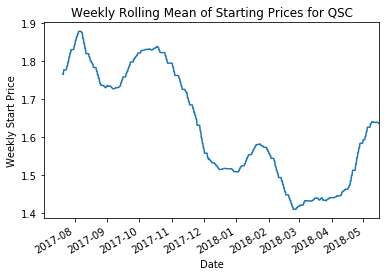

Ticker CON has 156457 records.


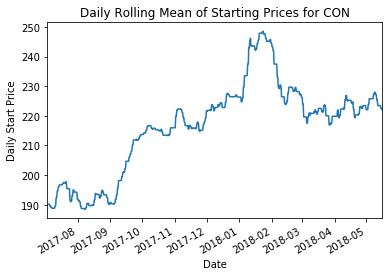

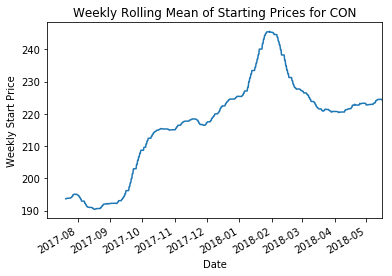

Ticker SGL has 156446 records.


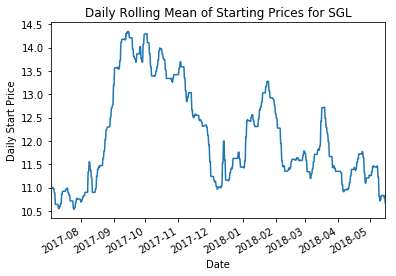

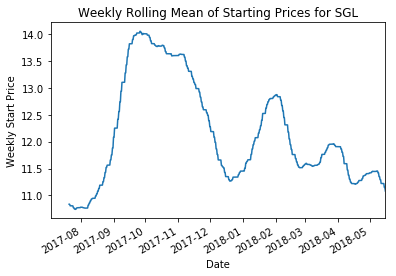

Ticker BVB has 156455 records.


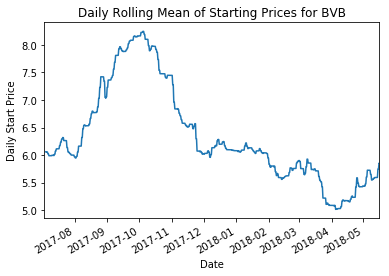

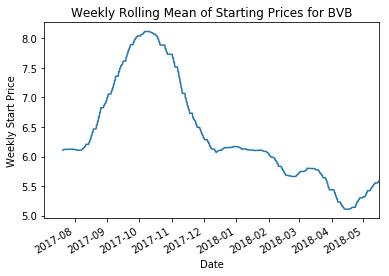

Ticker SHL has 28772 records.


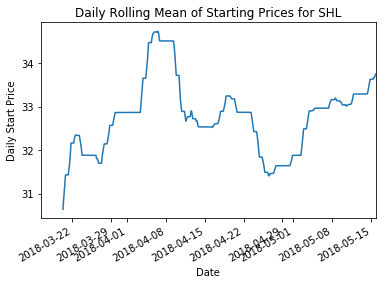

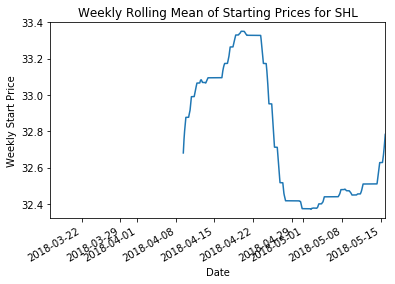

Ticker PNE3 has 156436 records.


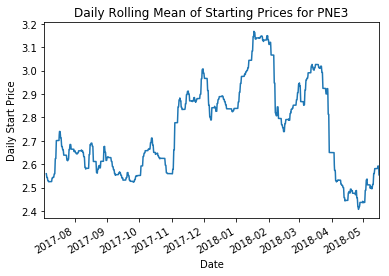

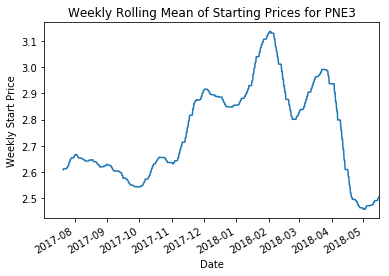

Ticker PBB has 156453 records.


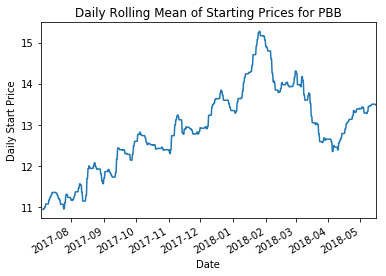

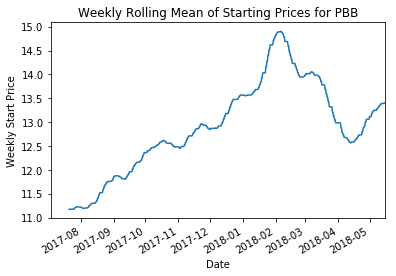

Ticker OSR has 156457 records.


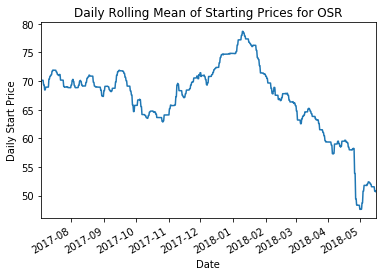

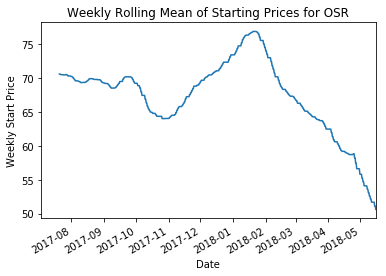

Ticker TINA has 156443 records.


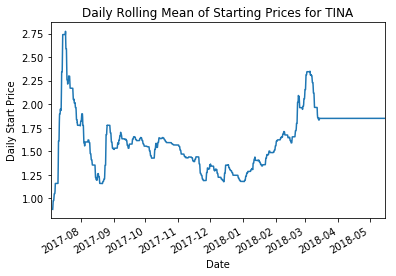

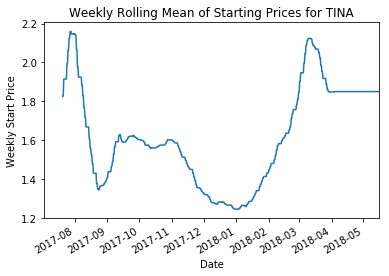

Ticker BEI has 156454 records.


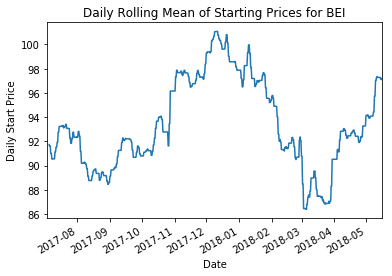

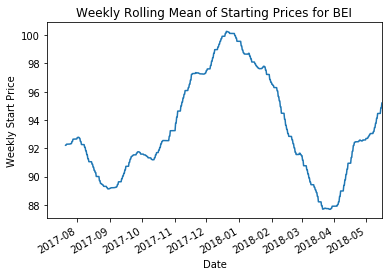

Ticker TEG has 156455 records.


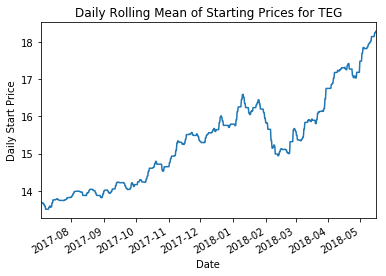

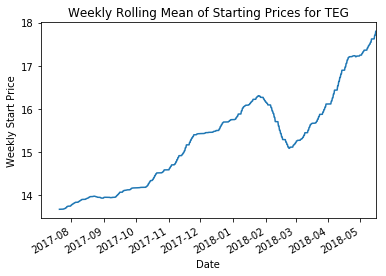

Ticker AOX has 156455 records.


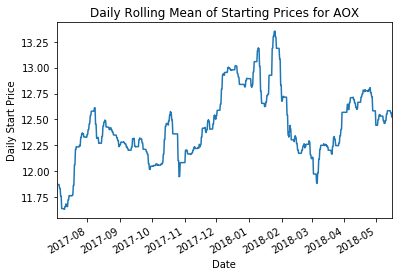

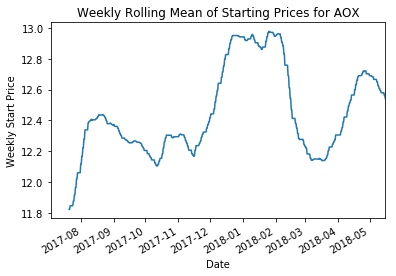

Ticker UTDI has 156457 records.


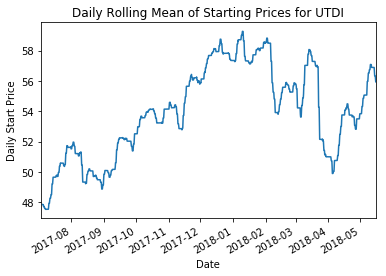

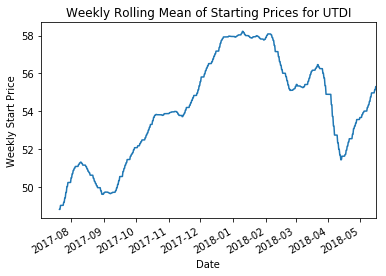

Ticker ARL has 156455 records.


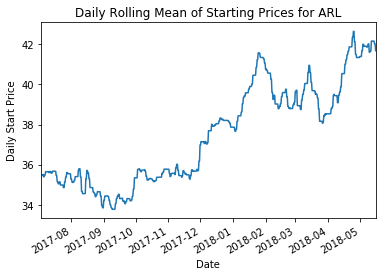

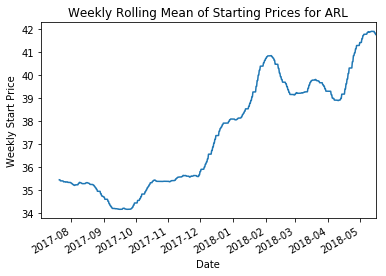

Ticker MDG1 has 156456 records.


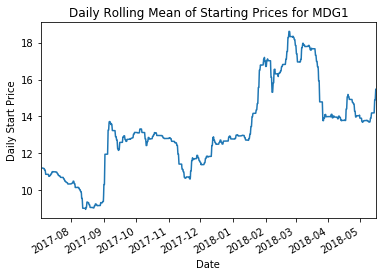

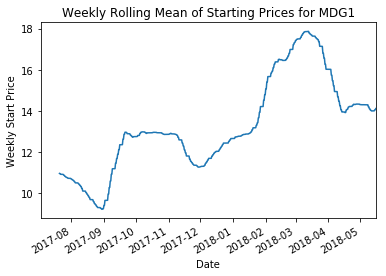

Ticker SANT has 156454 records.


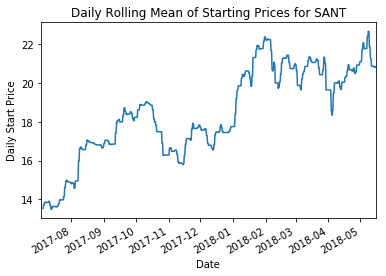

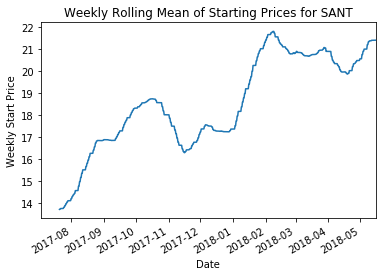

Ticker LXS has 156457 records.


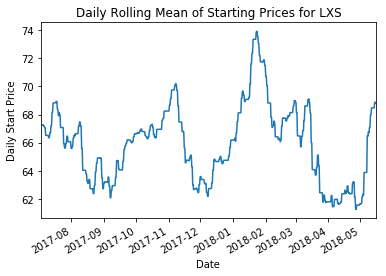

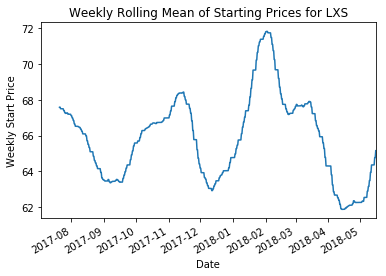

Ticker KGX has 156456 records.


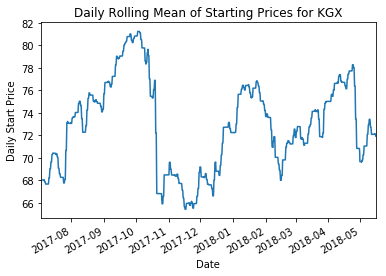

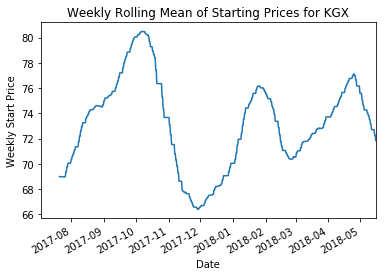

Ticker TTI has 156456 records.


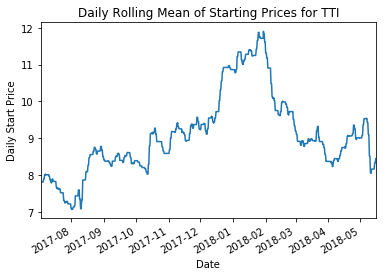

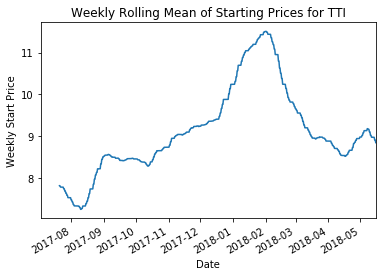

Ticker LINU has 128173 records.


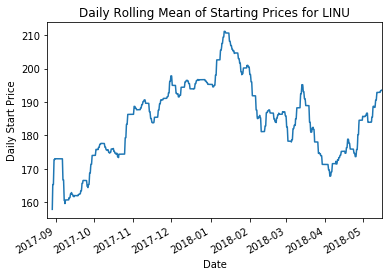

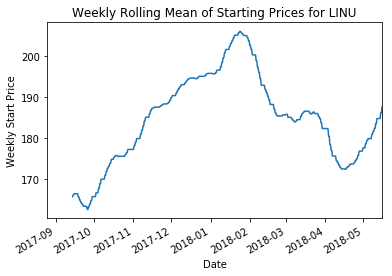

Ticker GYC has 156456 records.


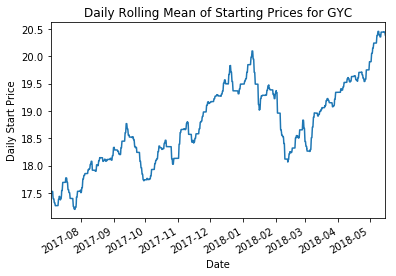

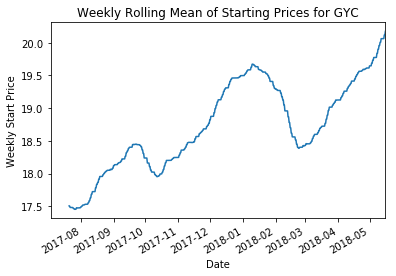

Ticker ARO has 156419 records.


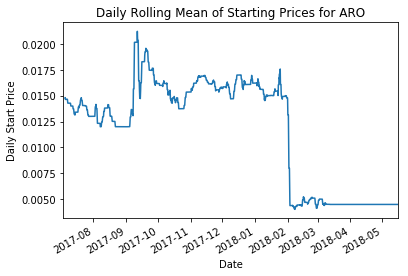

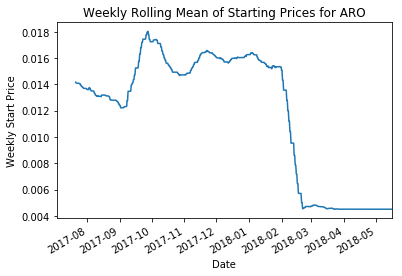

Ticker SOW has 156453 records.


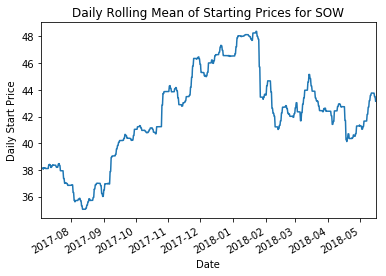

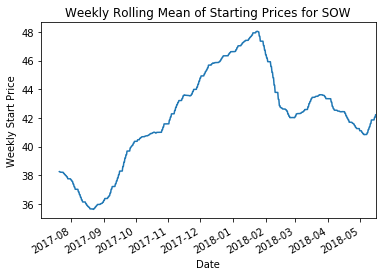

Ticker ANO has 156439 records.


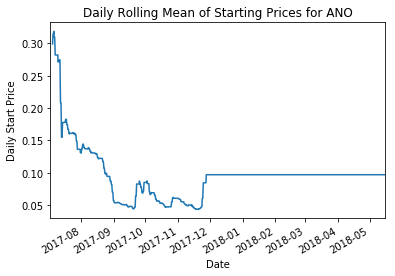

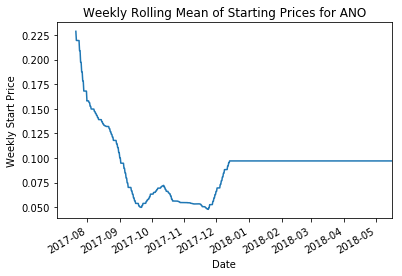

Ticker SZG has 156456 records.


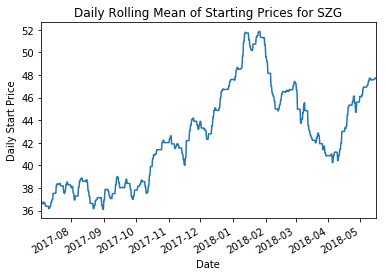

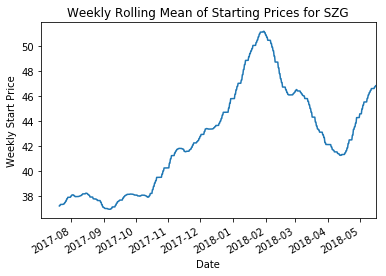

Ticker BOSS has 156457 records.


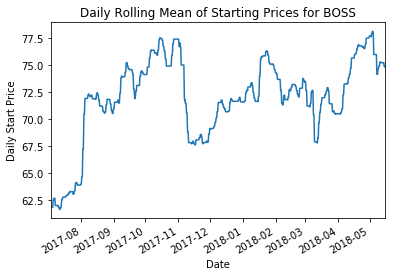

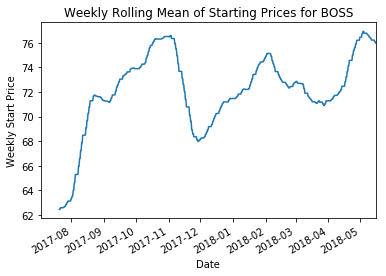

Ticker BNR has 156457 records.


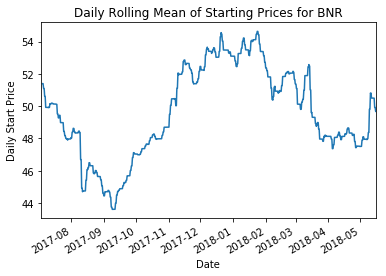

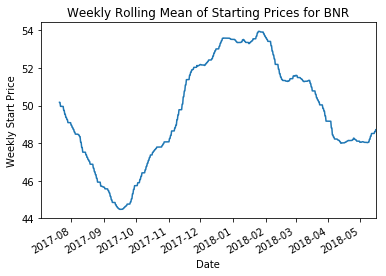

Ticker LLD has 156387 records.


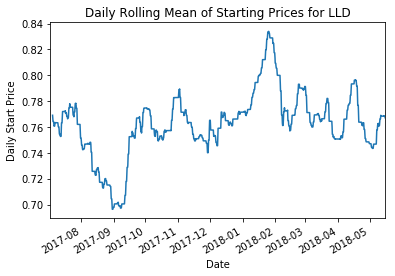

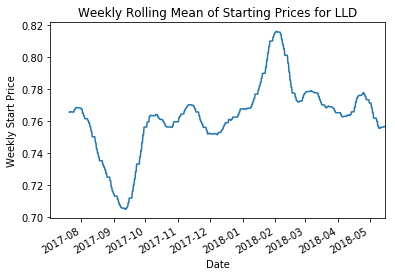

Ticker WAF has 156457 records.


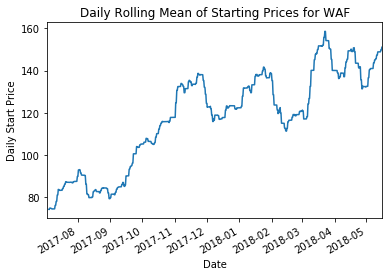

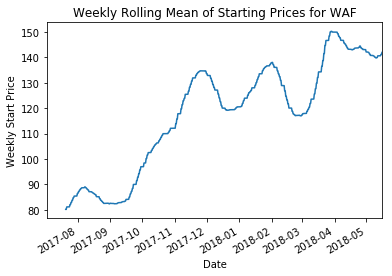

Ticker DRI has 156456 records.


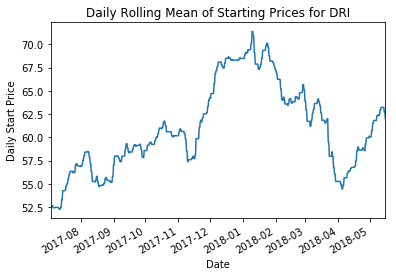

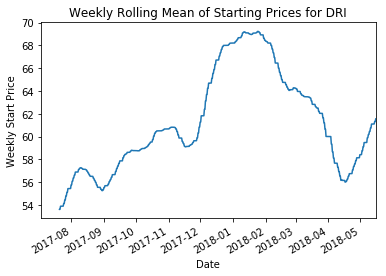

Ticker NDA has 156457 records.


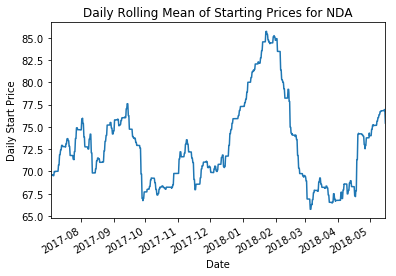

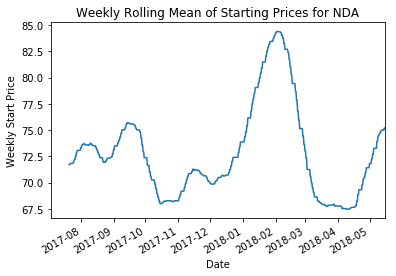

Ticker SY1 has 156455 records.


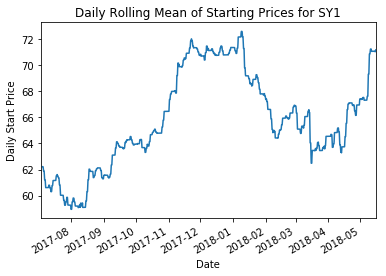

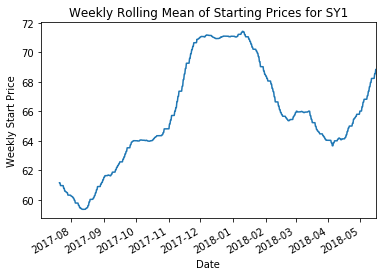

Ticker LIN has 156457 records.


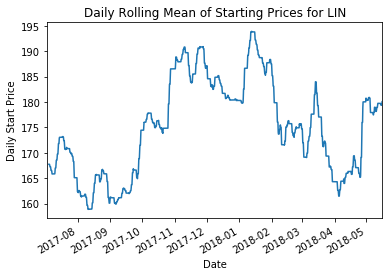

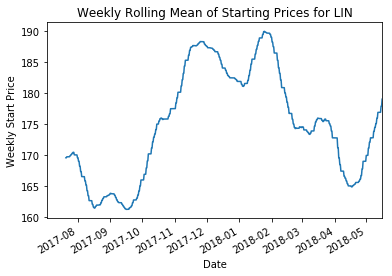

Ticker ZIL2 has 156433 records.


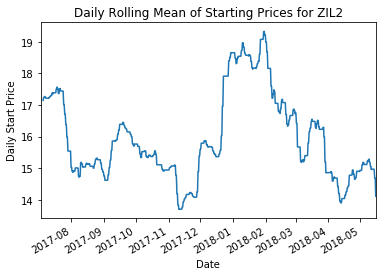

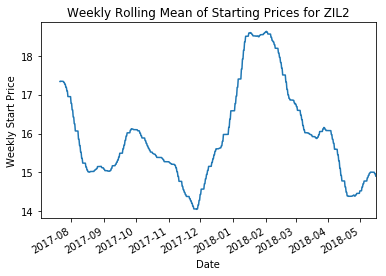

Ticker CAP has 156447 records.


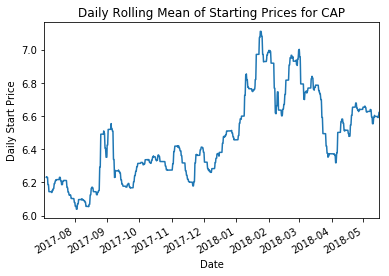

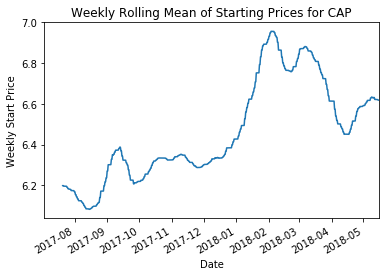

Ticker 3W9K has 156034 records.


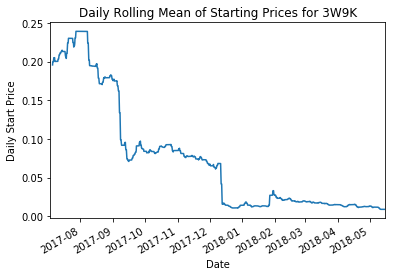

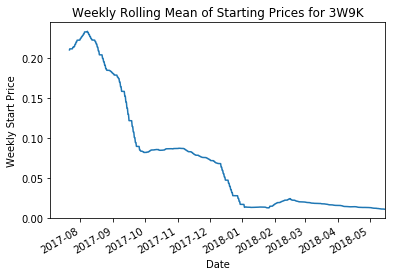

Generated Rolling Means in:167.93647


In [20]:
from statsmodels.graphics import tsaplots
start_time = datetime.now()
for ticker in volume_series.index:
    ticker_data = df[df['Mnemonic'] == ticker]
    ticker_data.reset_index(inplace=True)

    X = pd.to_numeric(pd.to_datetime(ticker_data['CalcDateTime']))
    X = X.values.reshape(-1, 1)

    Y = ticker_data['StartPrice']
    print("Ticker " + ticker + " has " + str(len(X)) + " records.")


    ticker_data['CalcDateTime'] = pd.to_datetime(ticker_data['CalcDateTime'])
    #ticker_data = ticker_data[['CalcDateTime', 'StartPrice']]
    ticker_data.set_index(ticker_data['CalcDateTime'], inplace=True)

#     # decomp freq: https://www.cbcity.de/timeseries-decomposition-in-python-with-statsmodels-and-pandas
#     result = seasonal_decompose(ticker_data.StartPrice, freq=10080)
#     trend = result.trend
#     result.plot()
#     plt.show()
    
#     # ACF Plots
#     pm.plot_acf(ticker_data.StartPrice[0:49])
#     # print(pm.utils.acf(ticker_data.StartPrice[0:49]))
    
#     fig = tsaplots.plot_acf(ticker_data.StartPrice, lags = 50)
#     ax = fig.add_subplot(111)
#     ax.set_xlabel('Lags')
#     ax.set_ylabel('Autocorrelation')
#     ax.set_title('Autocorrelation plot for ' + ticker + " (50 lags)" )
#     plt.show()
    
#     # PACF Plots
#     pm.plot_pacf(ticker_data.StartPrice[0:49])
#     # print(pm.utils.pacf(ticker_data.StartPrice[0:49]))
    
#     fig = tsaplots.plot_pacf(ticker_data.StartPrice, lags = 50)
#     ax = fig.add_subplot(111)
#     ax.set_xlabel('Lags')
#     ax.set_ylabel('Partial Autocorrelation')
#     ax.set_title('Partial Autocorrelation plot for ' + ticker + " (50 lags)" )
#     plt.show()
    
    # Rolling Averages
    daily_avg = ticker_data.StartPrice.rolling(window =60*24).mean()
    
    ax = daily_avg.plot()
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Start Price')
    ax.set_title('Daily Rolling Mean of Starting Prices for ' + ticker)
    plt.show()
    
    # Weekly Rolling Averages
    weekly_avg = ticker_data.StartPrice.rolling(window =60*24*7).mean()
    
    ax = weekly_avg.plot()
    ax.set_xlabel('Date')
    ax.set_ylabel('Weekly Start Price')
    ax.set_title('Weekly Rolling Mean of Starting Prices for ' + ticker)
    plt.show()
    
    
#     if ticker in ['AT1']:
#       continue;
    
#     # predict last 15 values since arima on 25% of the data is taking too long
#     train_index = np.arange(0,len(X) - 15)
#     test_index = np.arange(len(X) - 15, len(X))
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]

#     stepwise_model = pm.auto_arima(ticker_data.StartPrice)
#     print(stepwise_model.summary())
#     print(stepwise_model.aic())



end_time = datetime.now()
c = end_time - start_time
print("Generated Rolling Means in:" + str(c.total_seconds()))
